To program an artificial neuron with Numpy, it is important to know the formulas of gradient descent. We will use a supervised learning approach, starting with a dataset X, y has 2 variables. But the code developed here can also be used with N variables, everything adapts automatically!

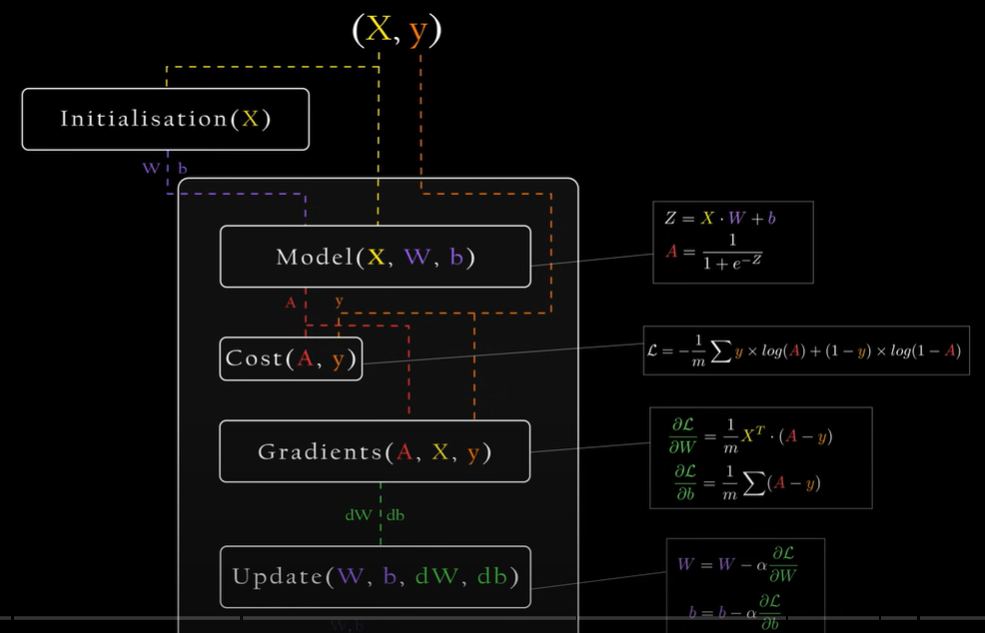

1 - DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

X is a (200, 2) matrix
y is a (200, 1) vector


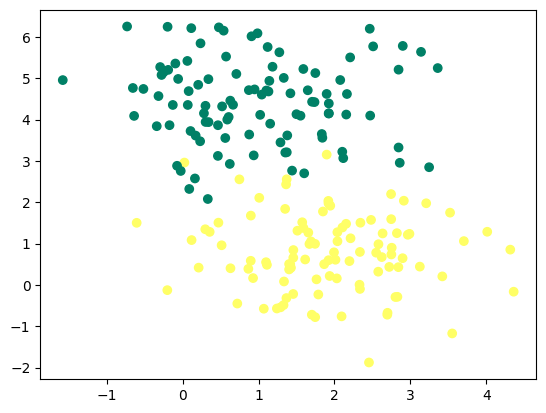

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('X is a {} matrix'.format(X.shape))
print('y is a {} vector'.format(y.shape))

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

2 - Functions definitions

- Data initialization:





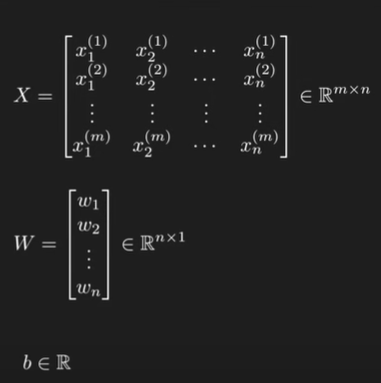

In [3]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

- Model:

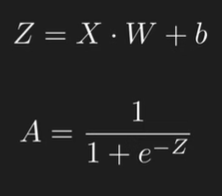
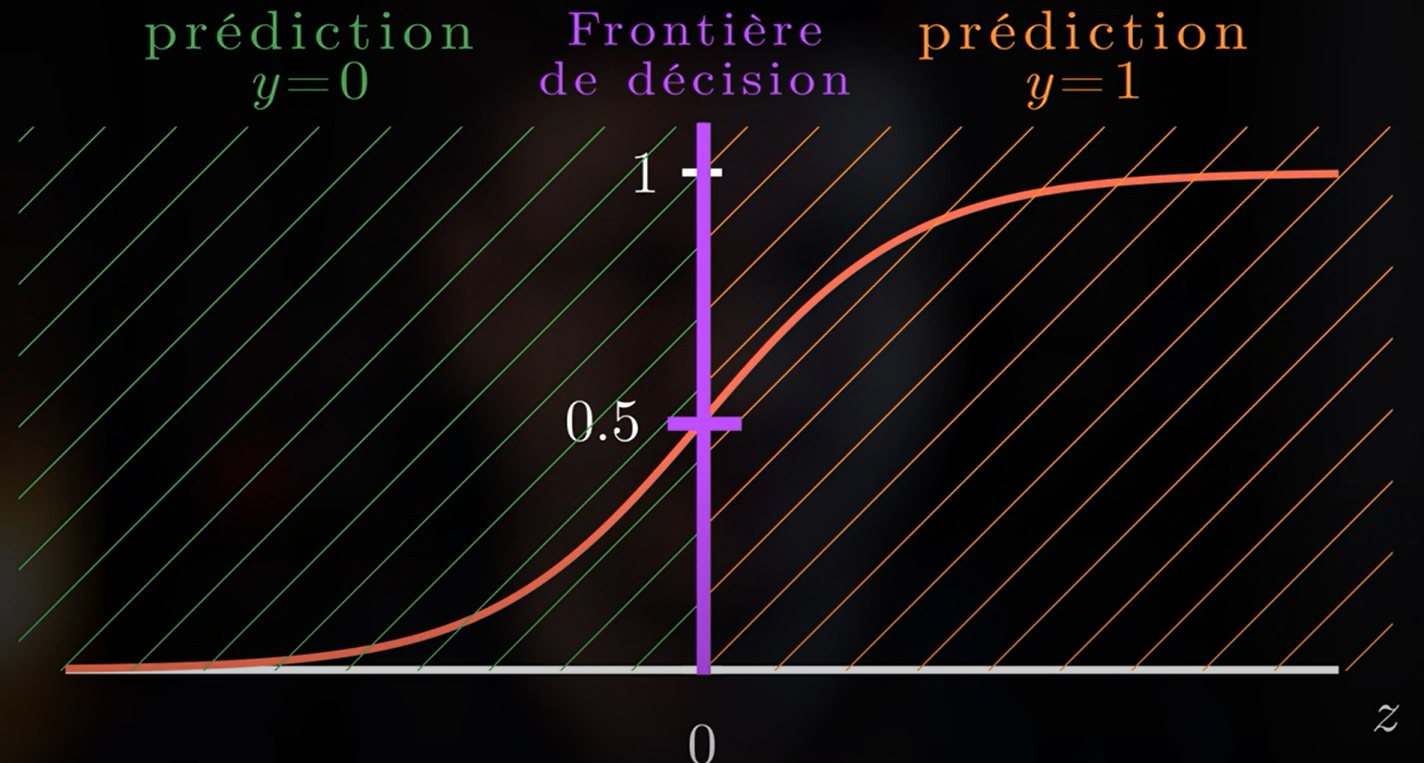

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

- Loss function / Log Loss:



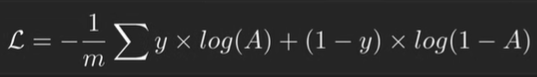

In [5]:
def log_loss(A, y):
    return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

- Gradients:



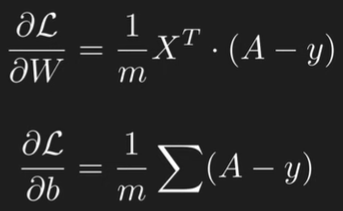

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

 - Update function:


 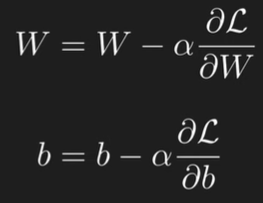

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

3 - Artificial Neuron



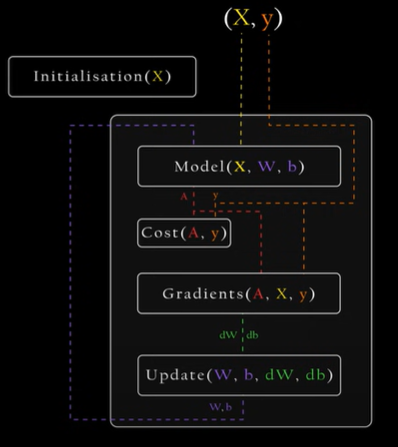

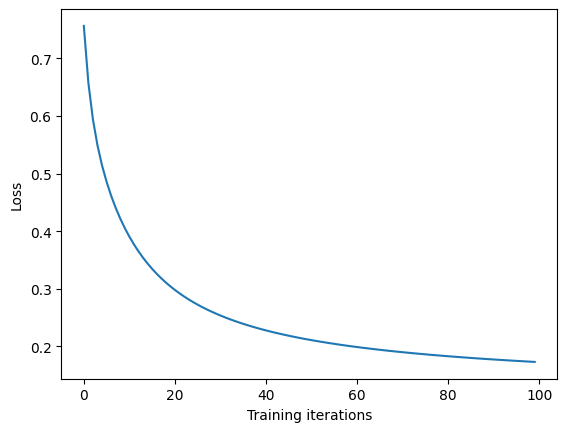

Outcome 1: The errors are decreasing with the iterations. We can say the model is LEARNING!

Outcome 2: The prediction of the model on the training data is 94.5% successful


In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialization(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Plot Loss function
    plt.plot(Loss)
    plt.xlabel("Training iterations")
    plt.ylabel("Loss")
    plt.show()

    # Accuracy rate
    y_pred = predict(X, W, b)
    print('\033[1m' +'\033[92m' + '\033[4m' +'Outcome 1: The errors are decreasing with the iterations. We can say the model is LEARNING!\n')
    print('\033[1m' +'\033[92m' + '\033[4m' + 'Outcome 2: The prediction of the model on the training data is {}% successful'.format((accuracy_score(y, y_pred))*100))

    return (W, b)

W, b = artificial_neuron(X, y)

4 - Decision boundary

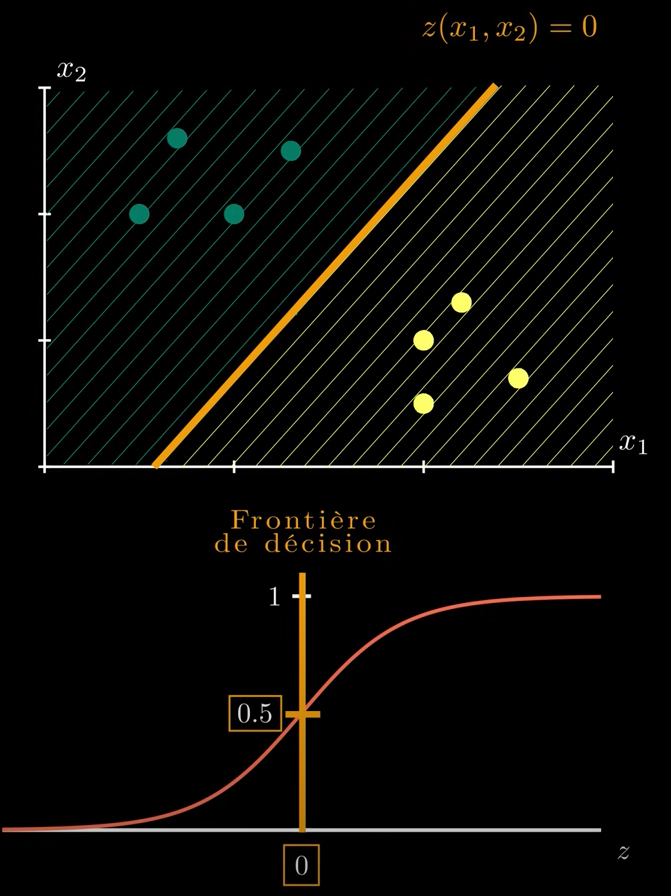

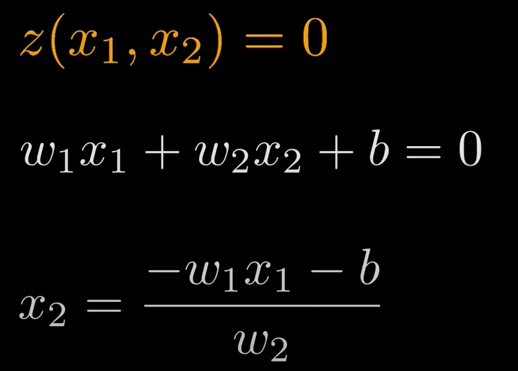

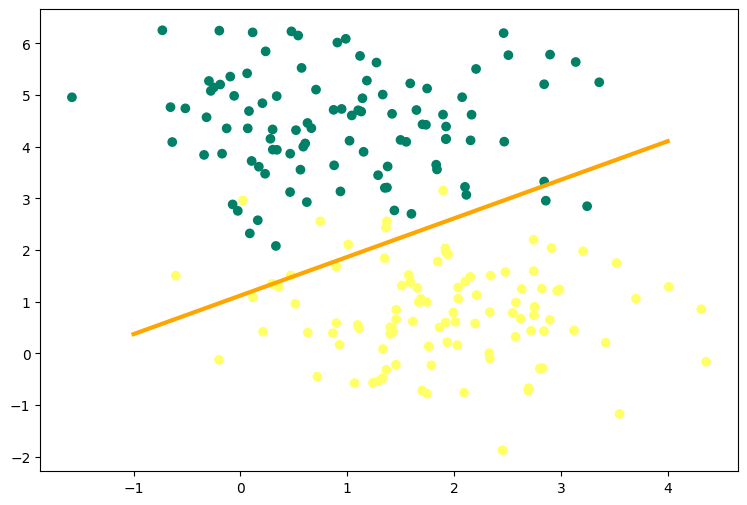

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

5 - 3D Vizualization

In [10]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [11]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()